**Please write your name here:**  Hanna Salings

**Please write your MST email here:**  hks539@mst.edu

# Programming assignment 3 (pa03) -- The human Interactome

https://thebiogrid.org/

0. Download the data from the website:
http://web.mst.edu/~taylorpat/Courses_files/Bioinformatics/Content/BIOGRID-ORGANISM-3.4.158.tab2.zip
    * Unpack the archive and note the individual files for each species, and the one for humans, that you will work with.
    * Put the human data file in a location accessible to the repo, but do not add it to the repositiory. It is large.

1. Read the following links in entirety: 
    * https://en.wikipedia.org/wiki/BioGRID
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC153463/pdf/gb-2003-4-3-r23.pdf
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5210573/pdf/gkw1102.pdf
    * http://science.sciencemag.org/content/sci/353/6306/aaf1420.full.pdf
    * https://wiki.thebiogrid.org/doku.php/experimental_systems
    * https://wiki.thebiogrid.org/doku.php/downloads
    * Write 2/3 of a page summarizeng what BioGrid does, how they curate and represent data, and one thing you found interesting about the Science paper above.

2. Paint a picture of the human interactome using basic plots, networkx statistics, and layout plots.
    * Plot basic descriptive statistics
    * Plot some basic graph statistics like degree distribution, clustering, a centrality measure, etc.
    * Use the human dataset I gave as a rough guideline for syntax, etc.
    * Tell an interesting story with the data and teach me something new!

3. Characterize some interesting genes/proteins/molecules
    * Which 5 nodes have the highest degree? What do they do? Write one paragraph about each, including any images you may find informative. You may consider consulting references such as these:
        * https://www.ncbi.nlm.nih.gov/guide/genes-expression/
        * https://www.ncbi.nlm.nih.gov/guide/proteins/
    * Which 5 nodes have the highest betweenness centrality? What do they do? Write one paragraph about each, including any images you may find informative. 
    * Pick one graph statistic of your own choice, and perform the same activity as the previous two.

You may want to do your actual programming in an IDE like Spyder, but please include the report and final code here in this notebook for submission.

## Complete your work below here:

### Biogrid Summary

Biogrid, the Biological General Repository for Interaction Datasets, is an open access biological database that contains interactions such as protein-protein interactions, genetics interactions, chemical interactions, and post-translational modifications that were initially created in 2003. BioGRID allows people to search for a protein or publication and access the annotation and curated data of it. The BioGRID has resources for all major model organism species and avoids redundancy in order for there to be just a single mapping of the data.
    
Data is curated and represented through a master look-up table. This table contains all of the primary and secondary Saccharomyces cerevisiae gene names and open reading frame (ORF) names. When a gene is entered into the BioGRID, it is put into a tabular format with additional information available, such as the description of its function, the Gene Ontology (GO) annotation, experimental system(s) where the interactions associated with the gene are based, the source of interaction data, and any publication links regarding the gene. Each row in the table is a unique interaction. When adding interactions into the BioGRID, only new interactions are accepted, and repeats are exluded. This is done in order to help curate any redundant information.
    
One thing I found interesting about the Science paper is how genetic interaction profiles help connect one gene to more genes by using negative and positive interactions. What was interesting was that the average gene participated in about 100 negative interactions and 65 positive interactions. However, when a gene was assessed at an intermediate confidence threshold, it was found that an even wider range of connectivity exists in the genetic interaction network. The 10% most connected genes ended up having an average degree of 340 negative interactions and the average positive interaction hub had 200 positive interactions, which is obviously much higher than the average gene numbers for negative and positive interactions.

### Plots and Statistics

In [27]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import operator

In [28]:
bg = pd.DataFrame.from_csv('BIOGRID-ORGANISM-Homo_sapiens-3.4.158.tab2.csv', sep = '\t')

G = nx.from_pandas_edgelist(bg, 'Official Symbol Interactor A', 'Official Symbol Interactor B')

/home/user/miniconda3/envs/iab-0.1.3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [61]:
plt.rcParams["figure.figsize"] = (10, 10)

In [48]:
# Basic Descriptive Info

#Density
print('Density:', nx.density(G))

Density: 0.001312004905801899


In [81]:
# Degrees
G.degree()

In [51]:
# Edges
G.edges()

In [72]:
# Average Clustering
print('Average Clustering: ',nx.average_clustering(G))

Average Clustering:  0.10243661826813609


In [73]:
# Assortativity
print('Assortativity: ',nx.degree_assortativity_coefficient(G))

Assortativity:  -0.0657600012252


In [41]:
# Degree Distribution
degreeVals = list(dict(G.degree()).values())

(array([  2.11590000e+04,   1.97000000e+02,   2.70000000e+01,
         7.00000000e+00,   4.00000000e+00,   3.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         1.00000000e+00]), array([  1.00000000e+00,   2.38000000e+02,   4.75000000e+02,
         7.12000000e+02,   9.49000000e+02,   1.18600000e+03,
         1.42300000e+03,   1.66000000e+03,   1.89700000e+03,
         2.13400000e+03,   2.37100000e+03]), <a list of 10 Patch objects>)


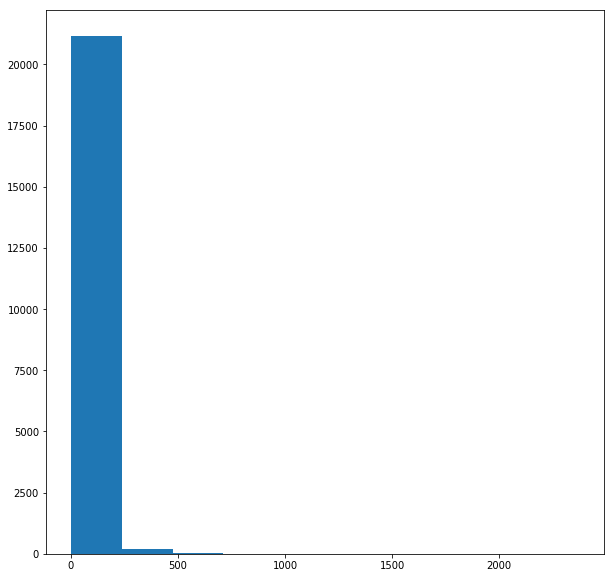

In [75]:
# Degree Histogram
print(plt.hist(degreeVals))

{'boxes': [<matplotlib.lines.Line2D object at 0x7f26c47b9a58>], 'medians': [<matplotlib.lines.Line2D object at 0x7f26c481c4e0>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x7f26c47b5f28>, <matplotlib.lines.Line2D object at 0x7f26c47ad780>], 'caps': [<matplotlib.lines.Line2D object at 0x7f26c47aa278>, <matplotlib.lines.Line2D object at 0x7f26c4820cf8>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f26c4814f98>]}


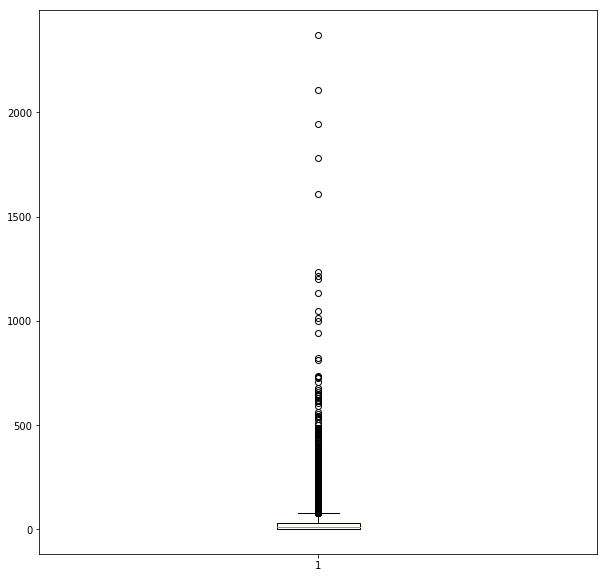

In [74]:
# Degree Boxplot
print(plt.boxplot(degreeVals))

#### Interpertations:

The histogram of the degree shows that the most of the genes have a degree value around 0-250, and much fewer with larger degrees. From sorting by the highest degree later on, it can be seen that the degrees go all the way up to 2371.

The boxplot of the degree shows that the median of the degree values are below the 250 range, and the larger values are outliers. There is a large amount of outliers in the 250-750 range.

In [55]:
# Clustering
clusterVals = list(dict(nx.clustering(G)).values())

(array([ 14831.,   3610.,   1078.,    801.,    223.,    148.,    178.,
           27.,     34.,    472.]), array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]), <a list of 10 Patch objects>)


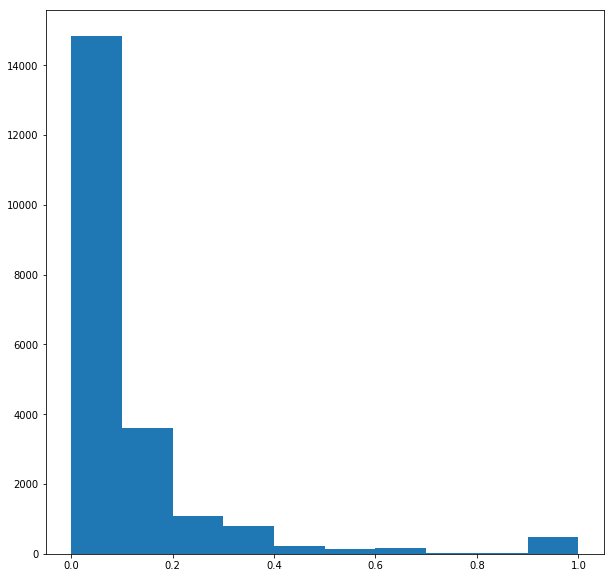

In [64]:
# Clustering Histogram
print(plt.hist(clusterVals))

{'boxes': [<matplotlib.lines.Line2D object at 0x7f26c36720f0>], 'medians': [<matplotlib.lines.Line2D object at 0x7f26c36d5cc0>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x7f26c3672780>, <matplotlib.lines.Line2D object at 0x7f26c3667f60>], 'caps': [<matplotlib.lines.Line2D object at 0x7f26c36e3860>, <matplotlib.lines.Line2D object at 0x7f26c36dd0b8>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f26c36d15c0>]}


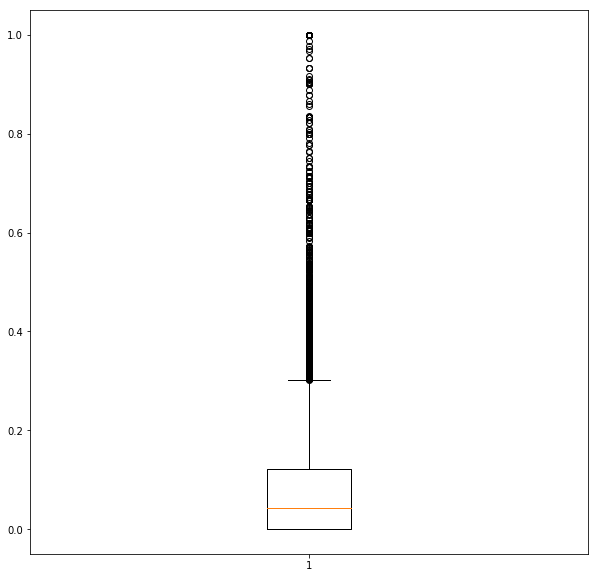

In [65]:
# Clustering Boxplot
print(plt.boxplot(clusterVals))

#### Interpertations:

The histogram for the clustering coefficient shows the degree of which the nodes cluster together. The majority of the nodes have a clustering coefficient of around 0.1, and the remaining nodes have a decreasing clustering coefficient until around 0.9, where it then begins to increase again.

The boxplot of the clustering coefficient shows that the median is around the 0.0 - 0.1 range, and the majority of the outliers are from the 0.3 - 0.8 range.

In [76]:
# Eigenvector Centrality
eigenvectorVals = list(nx.eigenvector_centrality(G).values())

(array([  2.06680000e+04,   4.92000000e+02,   1.40000000e+02,
         6.40000000e+01,   1.50000000e+01,   1.40000000e+01,
         6.00000000e+00,   0.00000000e+00,   2.00000000e+00,
         1.00000000e+00]), array([  3.71321697e-25,   1.46845136e-02,   2.93690272e-02,
         4.40535407e-02,   5.87380543e-02,   7.34225679e-02,
         8.81070815e-02,   1.02791595e-01,   1.17476109e-01,
         1.32160622e-01,   1.46845136e-01]), <a list of 10 Patch objects>)


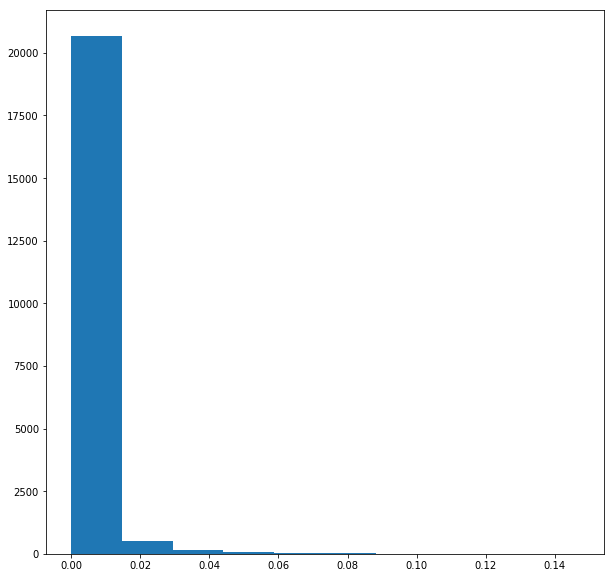

In [77]:
# Eigenvector Histogram
print(plt.hist(eigenvectorVals))

{'boxes': [<matplotlib.lines.Line2D object at 0x7f26c4aab358>], 'medians': [<matplotlib.lines.Line2D object at 0x7f26c4b105c0>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x7f26c4aa7c88>, <matplotlib.lines.Line2D object at 0x7f26c4b1f860>], 'caps': [<matplotlib.lines.Line2D object at 0x7f26c4b1b0b8>, <matplotlib.lines.Line2D object at 0x7f26c4b14b38>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f26c4b06dd8>]}


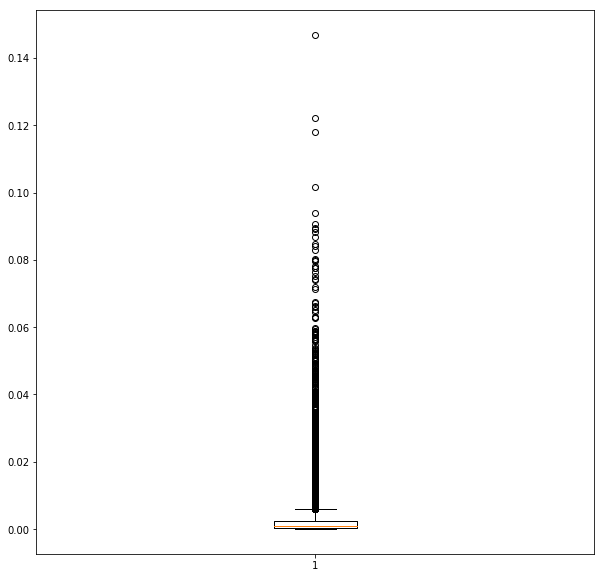

In [78]:
# Eigenvector Centrality Boxplot
print(plt.boxplot(eigenvectorVals))

#### Interpertations:

The histogram of the eigenvector centrality shows how many nodes have an influence in a network. The nodes that have a larger eigenvector centrality measure will be connected to more nodes that have high scores in the network. The plot shows that a majority of the degrees only have an eigenvector centrality score of around 0.01. The remaining nodes have values that range from 0.02 to 0.14, decreasing as the range goes further. This is most likely because the graph isn't very connected.

The boxplot shows that there is a median around 0.01, and most of the outliers range from around 0.02 to 0.08.

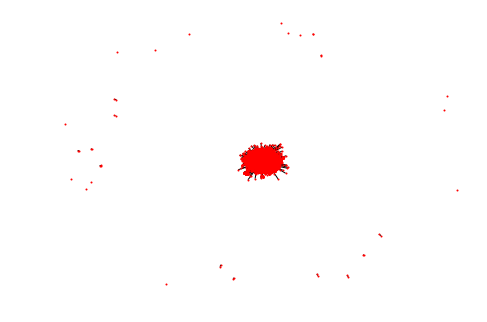

In [5]:
# Graph
nx.draw(G, node_size=1)

### Highest Degree, Betweenness Centrality, and Closeness Centrality:

In [15]:
# Highest Degrees
sortedByDegree = sorted(G.degree(), key=operator.itemgetter(1), reverse=True) # sort by the second column, reverse to get the highest degrees
print(*sortedByDegree[0:5], sep = "\n") # Print the 5 nodes with the highest degrees

('TRIM25', 2371)
('APP', 2107)
('NTRK1', 1944)
('ELAVL1', 1781)
('UBC', 1607)


In [79]:
# Betweeness Centrality:
betweennessSorted = sorted(nx.betweenness_centrality(G).items(), key=operator.itemgetter(1), reverse=True) # Sort by highest betweenness centrality
print(*betweennessSorted[0:5], sep= "\n") # Print the 5 highest betweenness centralities

('TRIM25', 0.08014247396684629)
('APP', 0.07367960353313963)
('UBC', 0.06409533792284744)
('ELAVL1', 0.05311077710561116)
('NTRK1', 0.03208298614181022)


In [4]:
# Closeness Centrality
centralitySorted = sorted(nx.closeness_centrality(G).items(), key=operator.itemgetter(1), reverse=True) # Sort the closeness centrality by highest
print(*centralitySorted[0:5], sep= "\n") # Print out the top 5 closeness centralities

('TRIM25', 0.4661945888417104)
('NTRK1', 0.4550885571389535)
('APP', 0.45503998949289054)
('UBC', 0.4508062537846824)
('ELAVL1', 0.45070141955374854)


## Information About Nodes

### Highest Degree

The 5 nodes with the highest degrees are:
        
        Node       Degree
        TRIM25     2371
        APP        2107
        NTRK1      1944
        ELAVL1     1781
        UBC        1607
        
Referenced ncbi.nlm.nih.gov/gene, uniprot.org, and ghr.nlm.nih.gov/gene for information on the genes

TRIM25:

The gene TRIM25 is the protein E3 ubiquitin/ISG15 TRIM25. Its official full name is tripartite motif containing 25, and its gene type is protein coding. It functions as a ubiquitin E3 ligase and an ISG15 E3 ligase. This gene helps the immune system defend against viruses. It does so by mediating ubiquintination of DDX58. This gene is crucial to being able to trigger the cytosolic signal transduction that leads to the production of interferons when a viral infection is found. TRIM25 triggers this by mediating the Lys-63 linked polyubiquintination of the DDX58 N-terminal CARD-like region. Along with this, TRIM25 also mediates estrogen action in several target organs. An example is mediating estrogen actions in breast cancer as a primary response gene.

APP:

The gene APP functions as a cell surface receptor and performs physiological functions on the surface of neurons that have to deal with neurite growth, neuronal adhesion, and axonogenesis. The official full name of APP is amyloid beta precursor protein. Its gene type is protein coding. Its job is to create the amyloid beta precursor protein. This protein is found in many tissues and organs, including important things such as the brain and spinal cord. When it encodes the cell surface receptor, the transmembrane precursor protein is cleaved by secretases to form peptides. Some peptides are secreted and bind to the aceltyltransferase complex, which helps to promote transcriptional activation. The other peptides form the protein basis of the amyloid plaques. These plaques are connected to Alzheimer disease, as they are found in the brains of patients with this disease. The location of the gene is 21q21.3 and its exon count is 20.

NTRK1:

The gene NTRK1 is of gene type protein coding and its official full name is neurotrophic tyrosine kinase 1. Its function is to encode a member of the neurotophic tyrosine kinase receptor family. When it binds to the kinase, the kinase phosphorylates itself and the other members of the MAPK pathway. This leads to differentiation within the cell, which can affect specifying sensory neuron subtypes. When this gene mutates, it can lead to congenital insensitivity to pain, anhidrosis, self-mutilating behavious, cognitive disability, and cancer. Its location is 1q23.1 and its exon count is 19.


ELAVL1:

The gene ELAVL1 is a protein coding gene, and its full official name is ELAV like RNA binding protein 1. It is a RNA-binding protein that binds to the 3'-UTR region of mRNAs, and by doing so, increases their stability. This gene is linked to many diseases, such as cancer. In cancer, it is a highly expressed gene, and is thought to be potentially useful in diagnosis of cancer, the prognosis, and therapy for cancer patients. Its location is 19p13.2 and its exon count is 7.

UBC:

The gene UBC is a protein coding gene. Its full official name is ubiquitin C. The encoded protein of this gene is a polyubiquitin precursor. When there is a conjugation of ubiquitin monomers or polymers, it can lead to the cell being effected in many ways. The effect on the cell depends on which ubiquitin is conjugated. Ubiquitination is associated with protein degradation, DNA repair, cell cycle regulation, kinase modification, endocytosis, and reulation of other cell signaling pathways. Its location is 12q24.31 and its exon count is 2.

        

### Highest Betweenness Centrality

The 5 nodes with the highest betweenness centrality are:

            Node          Betweenness Centrality
            
            TRIM25        0.08014247396684629
            APP           0.07367960353313963
            UBC           0.06409533792284744
            ELAVL1        0.05311077710561116
            NTRK1         0.03208298614181022
            
These nodes were already described above, so I will talk about the reason each gene most likely has the top 5 highest betweenness centrality.

TRIM25:

The TRIM25 gene and the APP gene are also the two highest degrees as well. This is probably because the TRIM25 gene helps the immune system defend against viruses and is therefore very important. Since it has to be able to defend against different kinds of viruses, it needs to have a lot of information. The betweenness centrality is a measure of how many times a node acts as a bridge along the shortest path between two nodes, and therefore nodes with a high betweenness centrality value will control information flow in a network. Because of this, it would make sense that the TRIM25 gene would have the highest degree and betweenness centrality value.

APP:

The APP gene deals with creating the protein that is found in tissues and organs such as the brain and spinal cord. It binds to other proteins and helps cells attach to one another. There are also studies that suggest that this gene helps direct movement of nerve cells during early development. Since it interacts with other nodes often, it is no surprise that it is the second highest degree and betweenness centrality.

UBC:

The UBC gene is important in maintaining cellular ubiquitin levels under stress conditions. It can attach to a portein, and has different functions depending on which protein it linked to. The different functions depend on the Lys residue of the ubiquitin that is linked. Since this gene has to link with different proteins to do different functions, it has a high betweenness centrality value.

ELAVL1:

The ELAV1 gene is a RNA-binding protein that binds to the 3'- UTR region of mRNAs. This gene is linked to many diseases. It most likely has a high betweennes centrality value because it is common enough to be found in many diseases. If it is present that often, it most likely has a role in binding with other nodes during the development of these diseases.

NTRK1:

The NTRK1 gene is essential for development and survival of nerve cells, especially the nerve cells that transmit information about sensesations such as pain, temperature, and touch. It is located on the surface of cells, mostly sensory neurons. This gene most likely has a high betweenness centrality value because it is connected to cells that transmit information, and therefore deals with controling information between many other nodes.


### Highest Closeness Centrality

The 5 nodes with the highest closeness centrality are:
    
        Node         Closeness Centrality
        
        TRIM25       0.4661945888417104)
        NTRK1        0.4550885571389535
        APP          0.45503998949289054
        UBC          0.4508062537846824
        ELAVL1       0.45070141955374854
        
These nodes were already described above, so I will talk about the reason each gene most likely has the top 5 highest closeness centrality value. The nodes with the highest closeness centrality values are the nodes that propogate information the fastest within a network.

TRIM25:

Much like the degree and betweenness centrality values, it most likely has the highest closeness centrality value because this gene deals with protecting against viruses. In order to do so, it must communicate with a large amount of other nodes. Because of this, it leads to being the node that can move information the quickest in the network because so many nodes are connected to the gene.

NTRK1:

The NTRK1 gene most likely has a high closeness centrality measure because it is connected to cells that deal with sensory information. Since the gene is connected to nodes that deal with nerve cells, it needs to be able to quickly send information.

APP:

The APP gene most likely has a high closeness centrality value because the gene helps protein bind with other proteins and cells attach to one another. Because of this, there is a lot of connection going on in the network with this gene, therefore making it easy for the gene to send out information in the network quickly.

UBC:

The UBC gene most likely has a high closeness centrality value because it attachs to several different proteins to do different functions. Since this gene is performing several different functions with different proteins, it is most likely connected to many different nodes and therefore decreasing the time it takes for the gene to send out information to other nodes in the network.

ELAVL1:

The ELAVL1 gene is linked to many diseases and deals with binding to the 3'- UTR region of mRNAs. It most likely is connected to many different nodes since it connects to many mRNAs and is found in many diseases. Because of this, the ELAVL1 gene most likely has a high closeness centrality value.